Objective: Predict the price

In [1]:
# Your code here
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv")
target_df= df["price"]

df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
# Obtain dimensions
df.shape

(48895, 16)

In [4]:
# Obtain information about data types and non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [5]:
duplicate_rows = df[df['id'].duplicated(keep='last')]
print(duplicate_rows)

Empty DataFrame
Columns: [id, name, host_id, host_name, neighbourhood_group, neighbourhood, latitude, longitude, room_type, price, minimum_nights, number_of_reviews, last_review, reviews_per_month, calculated_host_listings_count, availability_365]
Index: []


In [6]:
df.drop("id", axis = 1).duplicated().sum()

np.int64(0)

In [7]:
# Validating if there are any duplicates
df = df.drop_duplicates(subset = df.columns.difference(['id']))
print(df.shape)
df.head()

(48895, 16)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [8]:
if df.duplicated().sum():
    df = df.drop_duplicates()
print(df.shape)
df.head()

(48895, 16)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [9]:
df.drop(["id", "host_id", "name", "host_name", "last_review"], axis = 1, inplace = True)
df.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


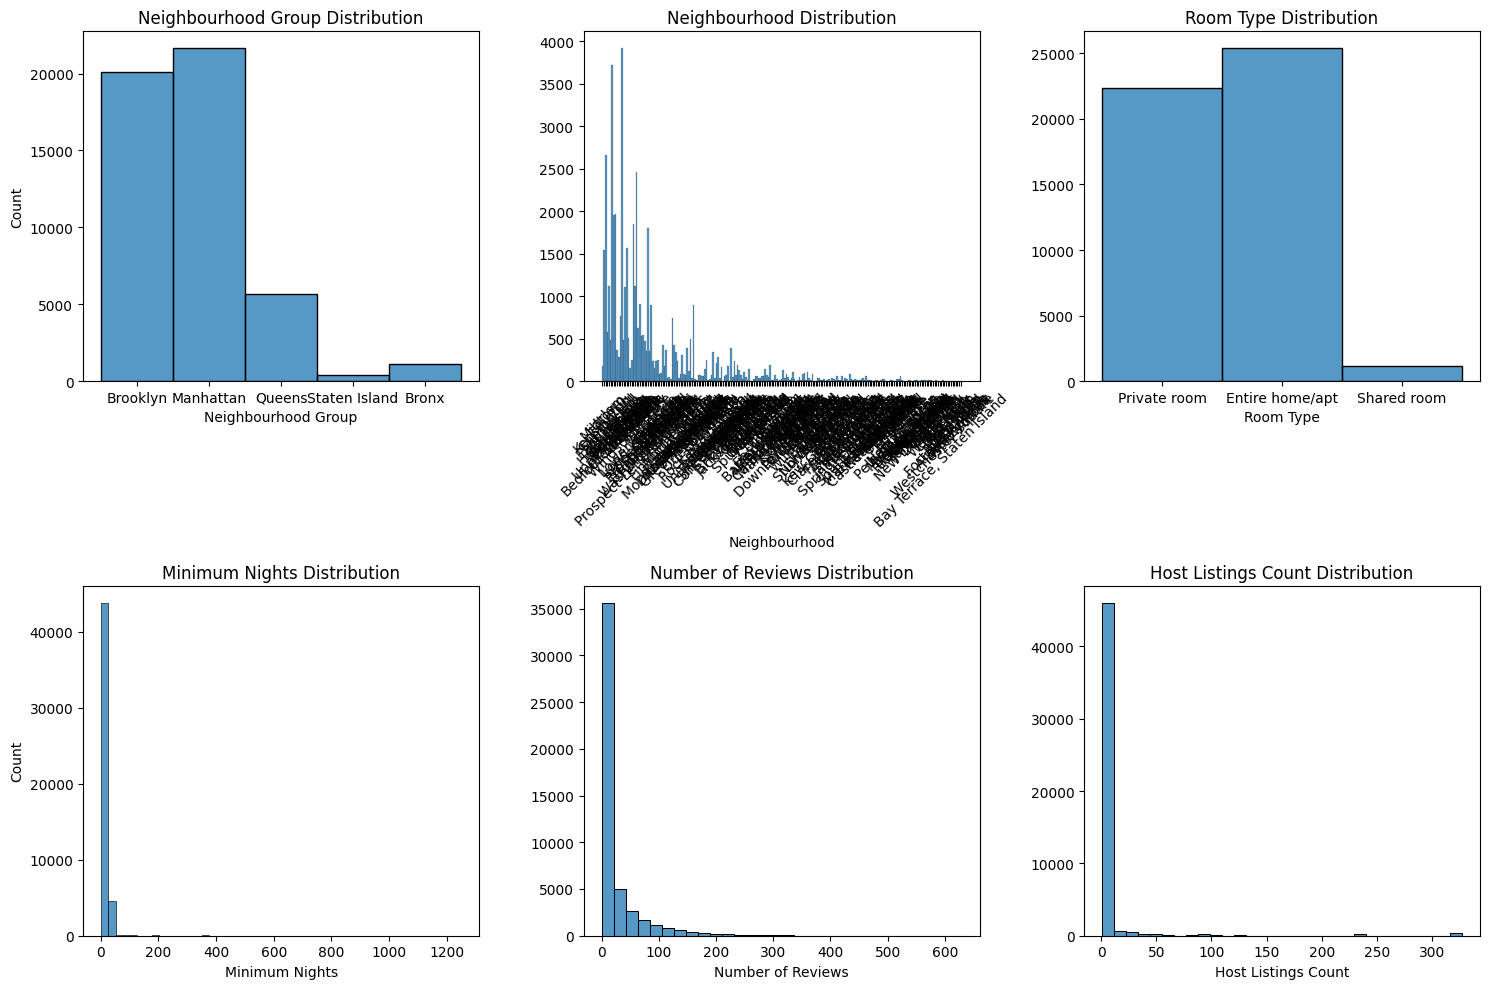

In [10]:
fig, axis = plt.subplots(2, 3, figsize=(15, 10))  # Increase figure size for better readability

# Neighbourhood Group histogram with categorical data adjusted
sns.histplot(ax=axis[0, 0], data=df, x="neighbourhood_group", discrete=True)
axis[0, 0].set_title("Neighbourhood Group Distribution")
axis[0, 0].set_xlabel("Neighbourhood Group")
axis[0, 0].set_ylabel("Count")

# Neighbourhood histogram with rotation of x-axis labels
sns.histplot(ax=axis[0, 1], data=df, x="neighbourhood", discrete=True)
axis[0, 1].set_title("Neighbourhood Distribution")
axis[0, 1].set_xlabel("Neighbourhood")
axis[0, 1].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better visibility
axis[0, 1].set_ylabel(None)  # Remove y-label to reduce clutter

# Room Type histogram with adjusted bar width for categorical data
sns.histplot(ax=axis[0, 2], data=df, x="room_type", discrete=True)
axis[0, 2].set_title("Room Type Distribution")
axis[0, 2].set_xlabel("Room Type")
axis[0, 2].set_ylabel(None)  # Remove y-label to reduce clutter

# Minimum Nights histogram with optimized bin size
sns.histplot(ax=axis[1, 0], data=df, x="minimum_nights", bins=50)
axis[1, 0].set_title("Minimum Nights Distribution")
axis[1, 0].set_xlabel("Minimum Nights")
axis[1, 0].set_ylabel("Count")

# Number of Reviews histogram with optimized bin size
sns.histplot(ax=axis[1, 1], data=df, x="number_of_reviews", bins=30)
axis[1, 1].set_title("Number of Reviews Distribution")
axis[1, 1].set_xlabel("Number of Reviews")
axis[1, 1].set_ylabel(None)  # Remove y-label to reduce clutter

# Calculated Host Listings Count histogram with optimized bin size
sns.histplot(ax=axis[1, 2], data=df, x="calculated_host_listings_count", bins=30)
axis[1, 2].set_title("Host Listings Count Distribution")
axis[1, 2].set_xlabel("Host Listings Count")
axis[1, 2].set_ylabel(None)  # Remove y-label to reduce clutter

# Adjust the layout to reduce overlap and improve spacing
plt.tight_layout()

# Show the plot
plt.show()

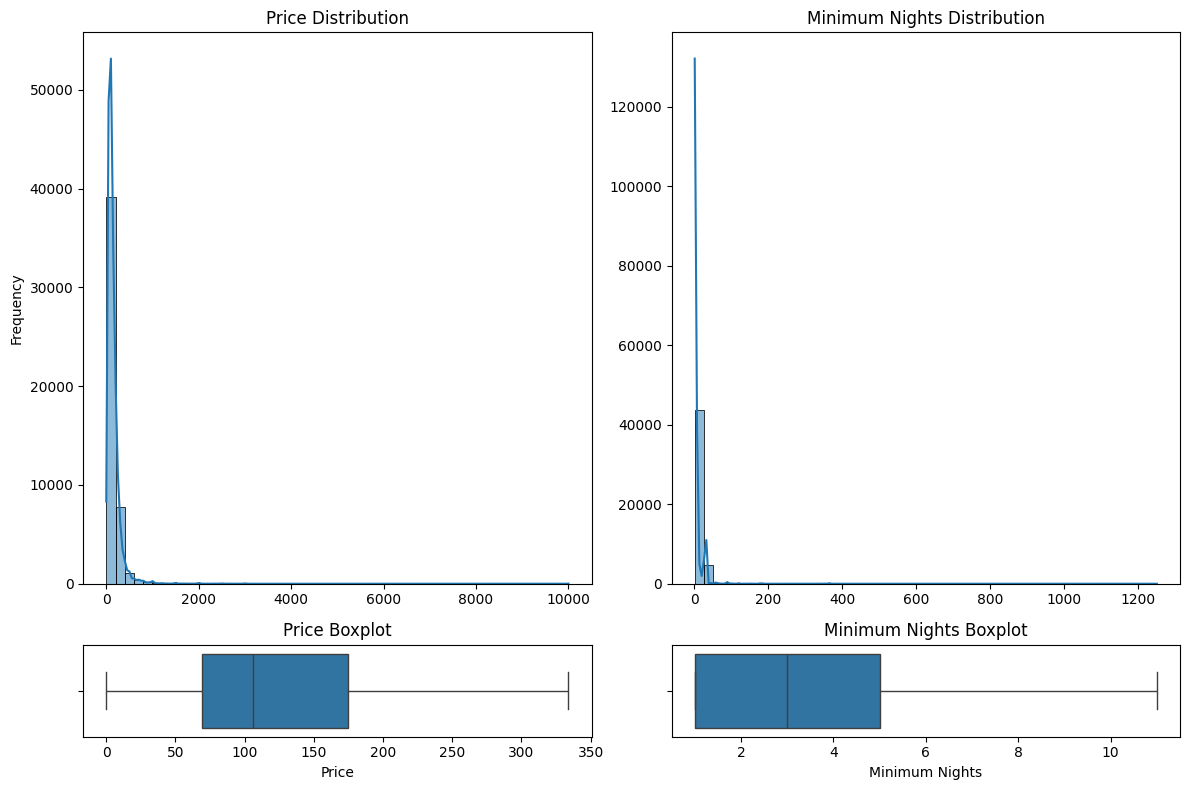

In [11]:
fig, axis = plt.subplots(2, 2, figsize=(12, 8), gridspec_kw={'height_ratios': [6, 1]})  # Slightly increase figure size

# Price histogram with better bin size and title
sns.histplot(ax=axis[0, 0], data=df, x="price", bins=50, kde=True)
axis[0, 0].set_title("Price Distribution")
axis[0, 0].set_xlabel(None)  # Remove x-label to avoid duplication with the boxplot
axis[0, 0].set_ylabel("Frequency")

# Price boxplot with title and outlier adjustment
sns.boxplot(ax=axis[1, 0], data=df, x="price", showfliers=False)
axis[1, 0].set_title("Price Boxplot")
axis[1, 0].set_xlabel("Price")
axis[1, 0].set_ylabel(None)  # Remove y-label for consistency

# Duplicated histogram for a different variable, e.g., `minimum_nights`
sns.histplot(ax=axis[0, 1], data=df, x="minimum_nights", bins=50, kde=True)
axis[0, 1].set_title("Minimum Nights Distribution")
axis[0, 1].set_xlabel(None)  # Remove x-label to avoid duplication with the boxplot
axis[0, 1].set_ylabel(None)  # Remove y-label for symmetry

# Minimum nights boxplot with title and outlier adjustment
sns.boxplot(ax=axis[1, 1], data=df, x="minimum_nights", showfliers=False)
axis[1, 1].set_title("Minimum Nights Boxplot")
axis[1, 1].set_xlabel("Minimum Nights")
axis[1, 1].set_ylabel(None)  # Remove y-label for consistency

# Adjust the layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

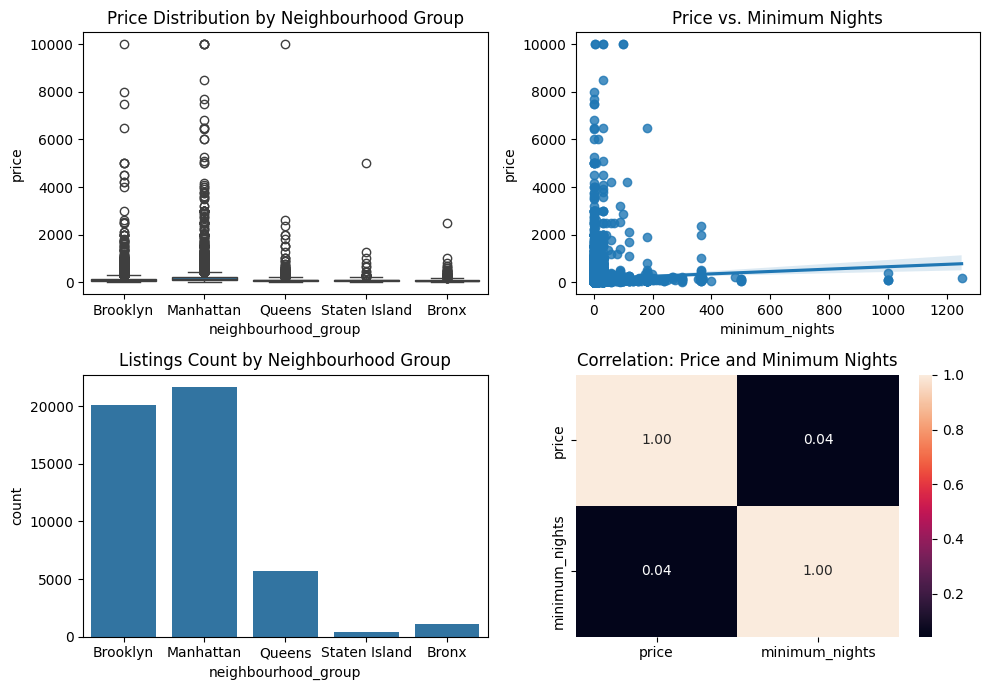

In [12]:
fig, axis = plt.subplots(2, 2, figsize=(10, 7))

# Create a boxplot instead of regplot for the categorical variable
sns.boxplot(ax=axis[0, 0], data=df, x="neighbourhood_group", y="price")
axis[0, 0].set_title("Price Distribution by Neighbourhood Group")

# Create a bar plot to show the count of listings in each neighbourhood group
sns.countplot(ax=axis[1, 0], data=df, x="neighbourhood_group")
axis[1, 0].set_title("Listings Count by Neighbourhood Group")

# Continue with regplot for continuous variable
sns.regplot(ax=axis[0, 1], data=df, x="minimum_nights", y="price")
axis[0, 1].set_title("Price vs. Minimum Nights")

# Correlation heatmap for continuous variables
sns.heatmap(df[["price", "minimum_nights"]].corr(), annot=True, fmt=".2f", ax=axis[1, 1])
axis[1, 1].set_title("Correlation: Price and Minimum Nights")

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

/tmp/ipykernel_43126/2211689021.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axis[0, 2], x=avg_price_neighbourhood.values, y=avg_price_neighbourhood.index, palette="viridis", legend=False)


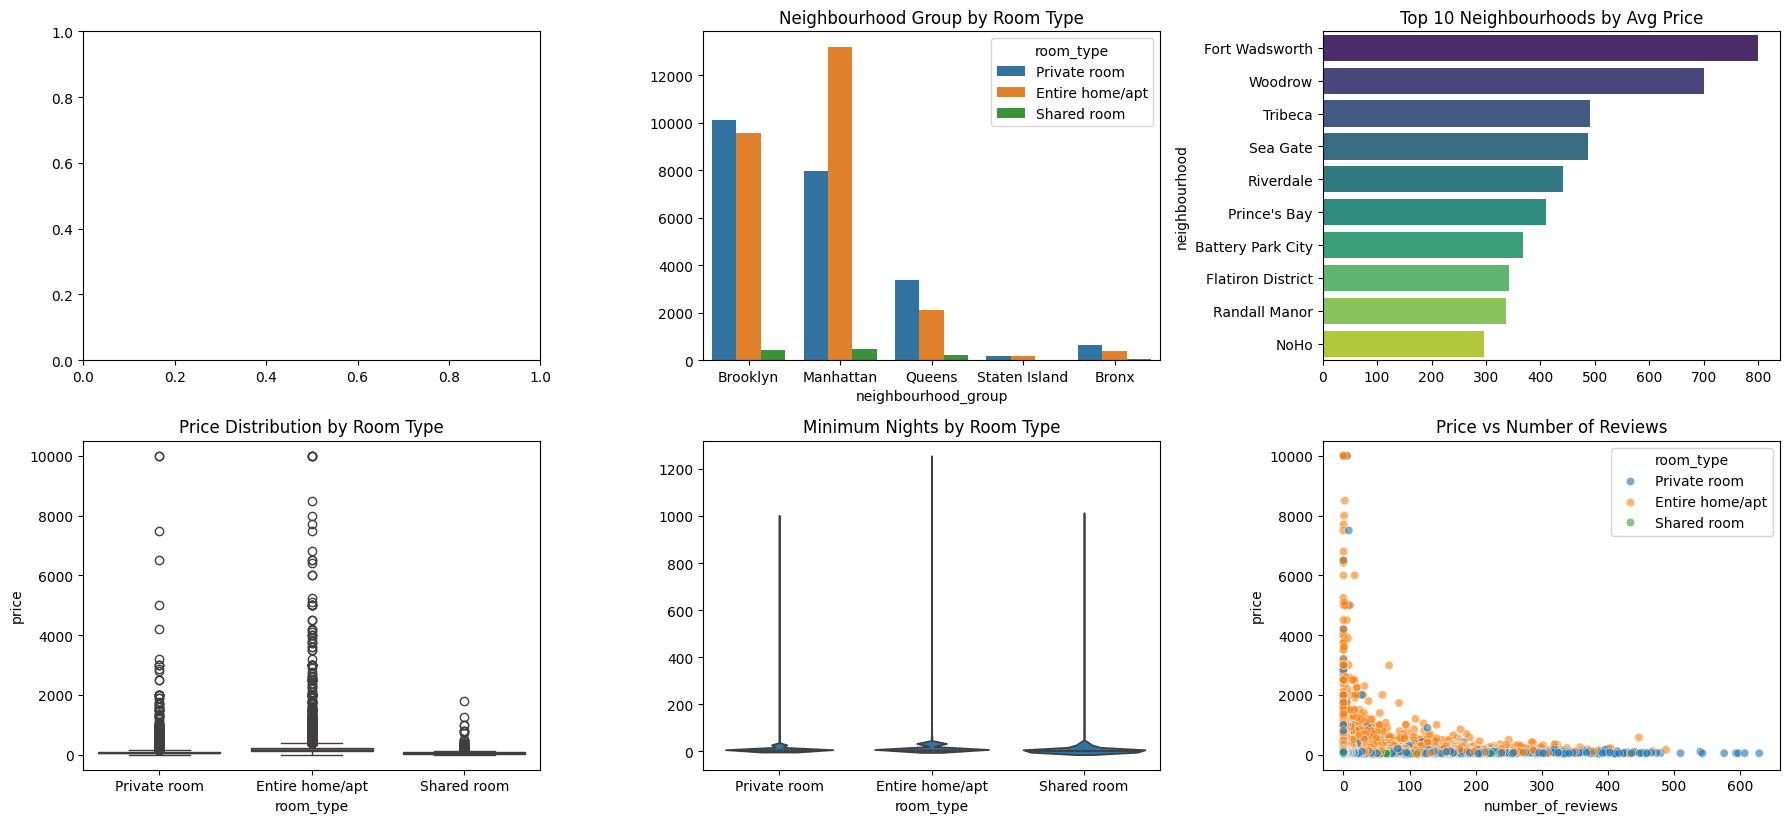

In [14]:
# Calculate average price per neighbourhood
avg_price_neighbourhood = df.groupby('neighbourhood')['price'].mean().nlargest(10)

# Plotting
fig, axis = plt.subplots(3, 3, figsize=(18, 12))

# Count plot for host_id with limited categories (e.g., top 10)
#top_hosts = df['host_id'].value_counts().nlargest(10).index
#sns.countplot(ax=axis[0, 0], data=df[df['host_id'].isin(top_hosts)], x="host_id", hue="room_type")
#axis[0, 0].set_title("Top 10 Hosts by Room Type")
#axis[0, 0].tick_params(axis='x', rotation=45)

# Count plot for neighbourhood_group
sns.countplot(ax=axis[0, 1], data=df, x="neighbourhood_group", hue="room_type")
axis[0, 1].set_title("Neighbourhood Group by Room Type")
axis[0, 1].set_ylabel(None)

# Bar plot for average price per neighbourhood (hue assignment)
sns.barplot(ax=axis[0, 2], x=avg_price_neighbourhood.values, y=avg_price_neighbourhood.index, palette="viridis", legend=False)
axis[0, 2].set_title("Top 10 Neighbourhoods by Avg Price")

# Box plot for room_type and price
sns.boxplot(ax=axis[1, 0], data=df, x="room_type", y="price")
axis[1, 0].set_title("Price Distribution by Room Type")

# Violin plot for minimum_nights and room_type (updated parameter)
sns.violinplot(ax=axis[1, 1], data=df, x="room_type", y="minimum_nights", inner='quartile')
axis[1, 1].set_title("Minimum Nights by Room Type")
axis[1, 1].set_ylabel(None)

# Scatter plot to visualize relationship between price and number of reviews
sns.scatterplot(ax=axis[1, 2], data=df, x="number_of_reviews", y="price", hue="room_type", alpha=0.6)
axis[1, 2].set_title("Price vs Number of Reviews")

# Removing the extra axes since we're not plotting anything there
fig.delaxes(axis[2, 0])
fig.delaxes(axis[2, 1])
fig.delaxes(axis[2, 2])

plt.tight_layout()
plt.show()

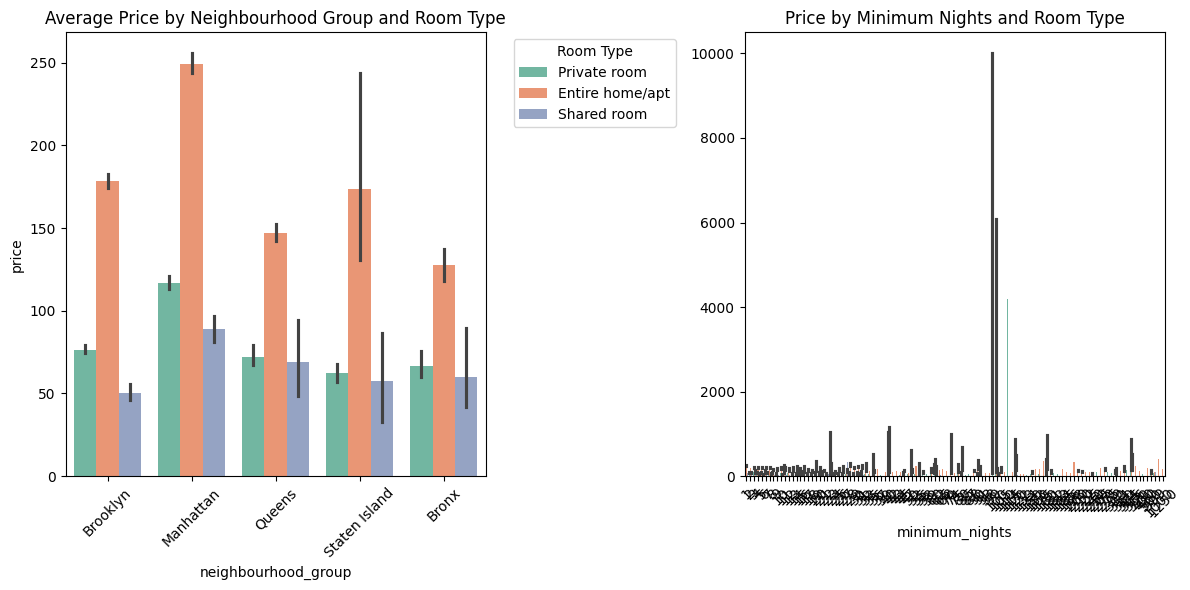

In [15]:
fig, axis = plt.subplots(figsize=(12, 6), ncols=2)

# Bar plot for Neighbourhood Group vs Price with Room Type as hue
sns.barplot(ax=axis[0], data=df, x="neighbourhood_group", y="price", hue="room_type", palette="Set2")
axis[0].set_title("Average Price by Neighbourhood Group and Room Type")
axis[0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability
axis[0].legend(title="Room Type", bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside the plot

# Bar plot for Minimum Nights vs Price with Room Type as hue
sns.barplot(ax=axis[1], data=df, x="minimum_nights", y="price", hue="room_type", palette="Set2", legend=False)
axis[1].set_title("Price by Minimum Nights and Room Type")
axis[1].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability
axis[1].set_ylabel(None)  # Remove redundant y-axis label

# Adjust layout to prevent overlap
plt.tight_layout()

plt.show()

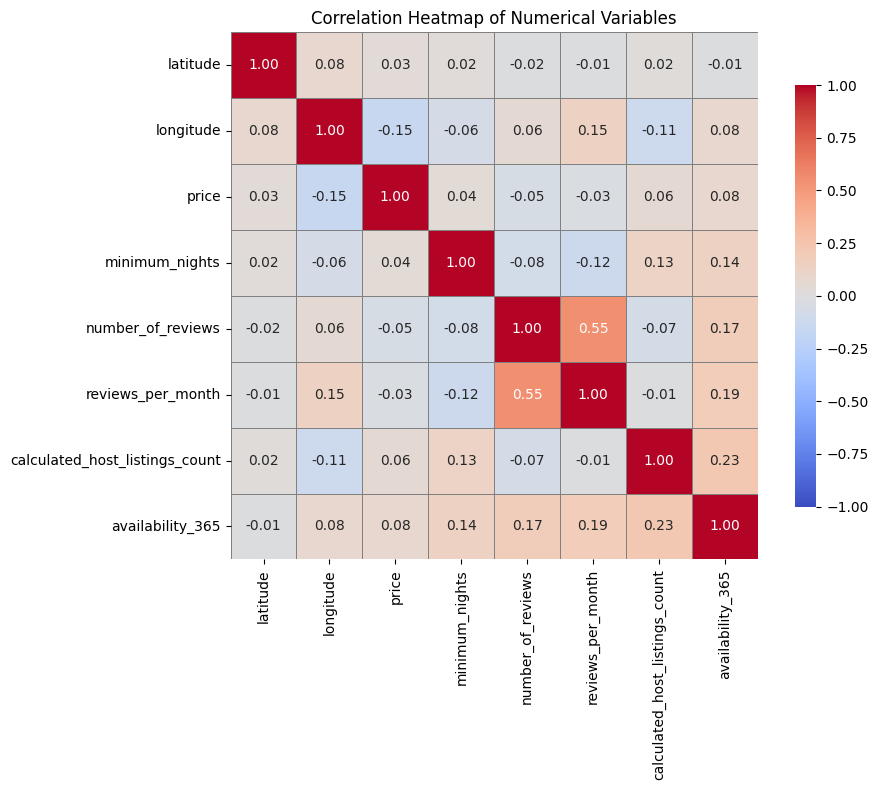

In [16]:
fig, ax = plt.subplots(figsize=(10, 8))

# Select only numeric columns
numeric_df = df.select_dtypes(include='number')

# Plot the heatmap
sns.heatmap(
    numeric_df.corr(),
    annot=True,            # Display correlation coefficients
    fmt=".2f",            # Format for annotation text
    cmap='coolwarm',      # Color map for the heatmap
    ax=ax,                # Specify the axis for the plot
    vmin=-1, vmax=1,      # Set the color scale to range from -1 to 1
    center=0,             # Center the color map at 0
    square=True,          # Make the heatmap square
    linewidths=0.5,      # Add lines between cells
    linecolor='gray',    # Line color between cells
    cbar_kws={'shrink': .8}  # Color bar settings
)
ax.set_title("Correlation Heatmap of Numerical Variables")

# Adjust layout to ensure everything fits well
plt.tight_layout()

# Show the plot
plt.show()

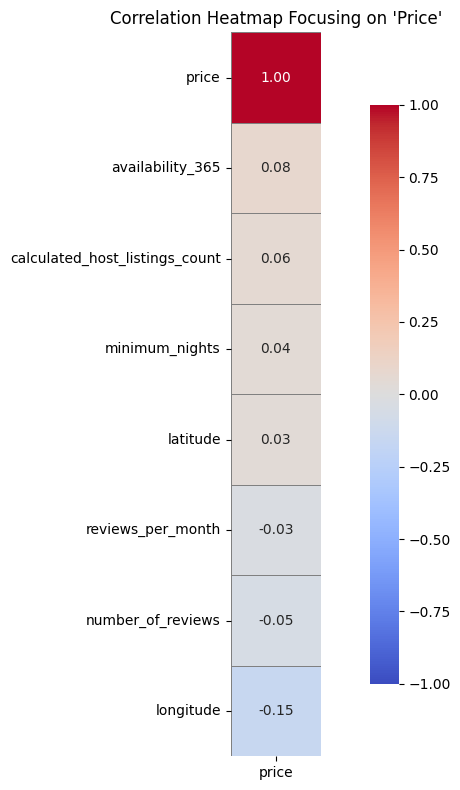

In [17]:
fig, ax = plt.subplots(figsize=(10, 8))

# Select only numeric columns and include 'price'
numeric_df = df.select_dtypes(include='number')

# Ensure 'price' is included
if 'price' not in numeric_df.columns:
    raise ValueError("The 'price' column is not in the numeric data")

# Calculate the correlation matrix for 'price' and other numeric variables
corr_matrix = numeric_df.corr()
price_corr = corr_matrix[['price']].sort_values(by='price', ascending=False)

# Plot the heatmap
sns.heatmap(
    price_corr,            # Use correlation matrix for 'price'
    annot=True,            # Display correlation coefficients
    fmt=".2f",            # Format for annotation text
    cmap='coolwarm',      # Color map for the heatmap
    ax=ax,                # Specify the axis for the plot
    vmin=-1, vmax=1,      # Set the color scale to range from -1 to 1
    center=0,             # Center the color map at 0
    square=True,          # Make the heatmap square
    linewidths=0.5,      # Add lines between cells
    linecolor='gray',    # Line color between cells
    cbar_kws={'shrink': .8}  # Color bar settings
)
ax.set_title("Correlation Heatmap Focusing on 'Price'")

# Adjust layout to ensure everything fits well
plt.tight_layout()

# Show the plot
plt.show()

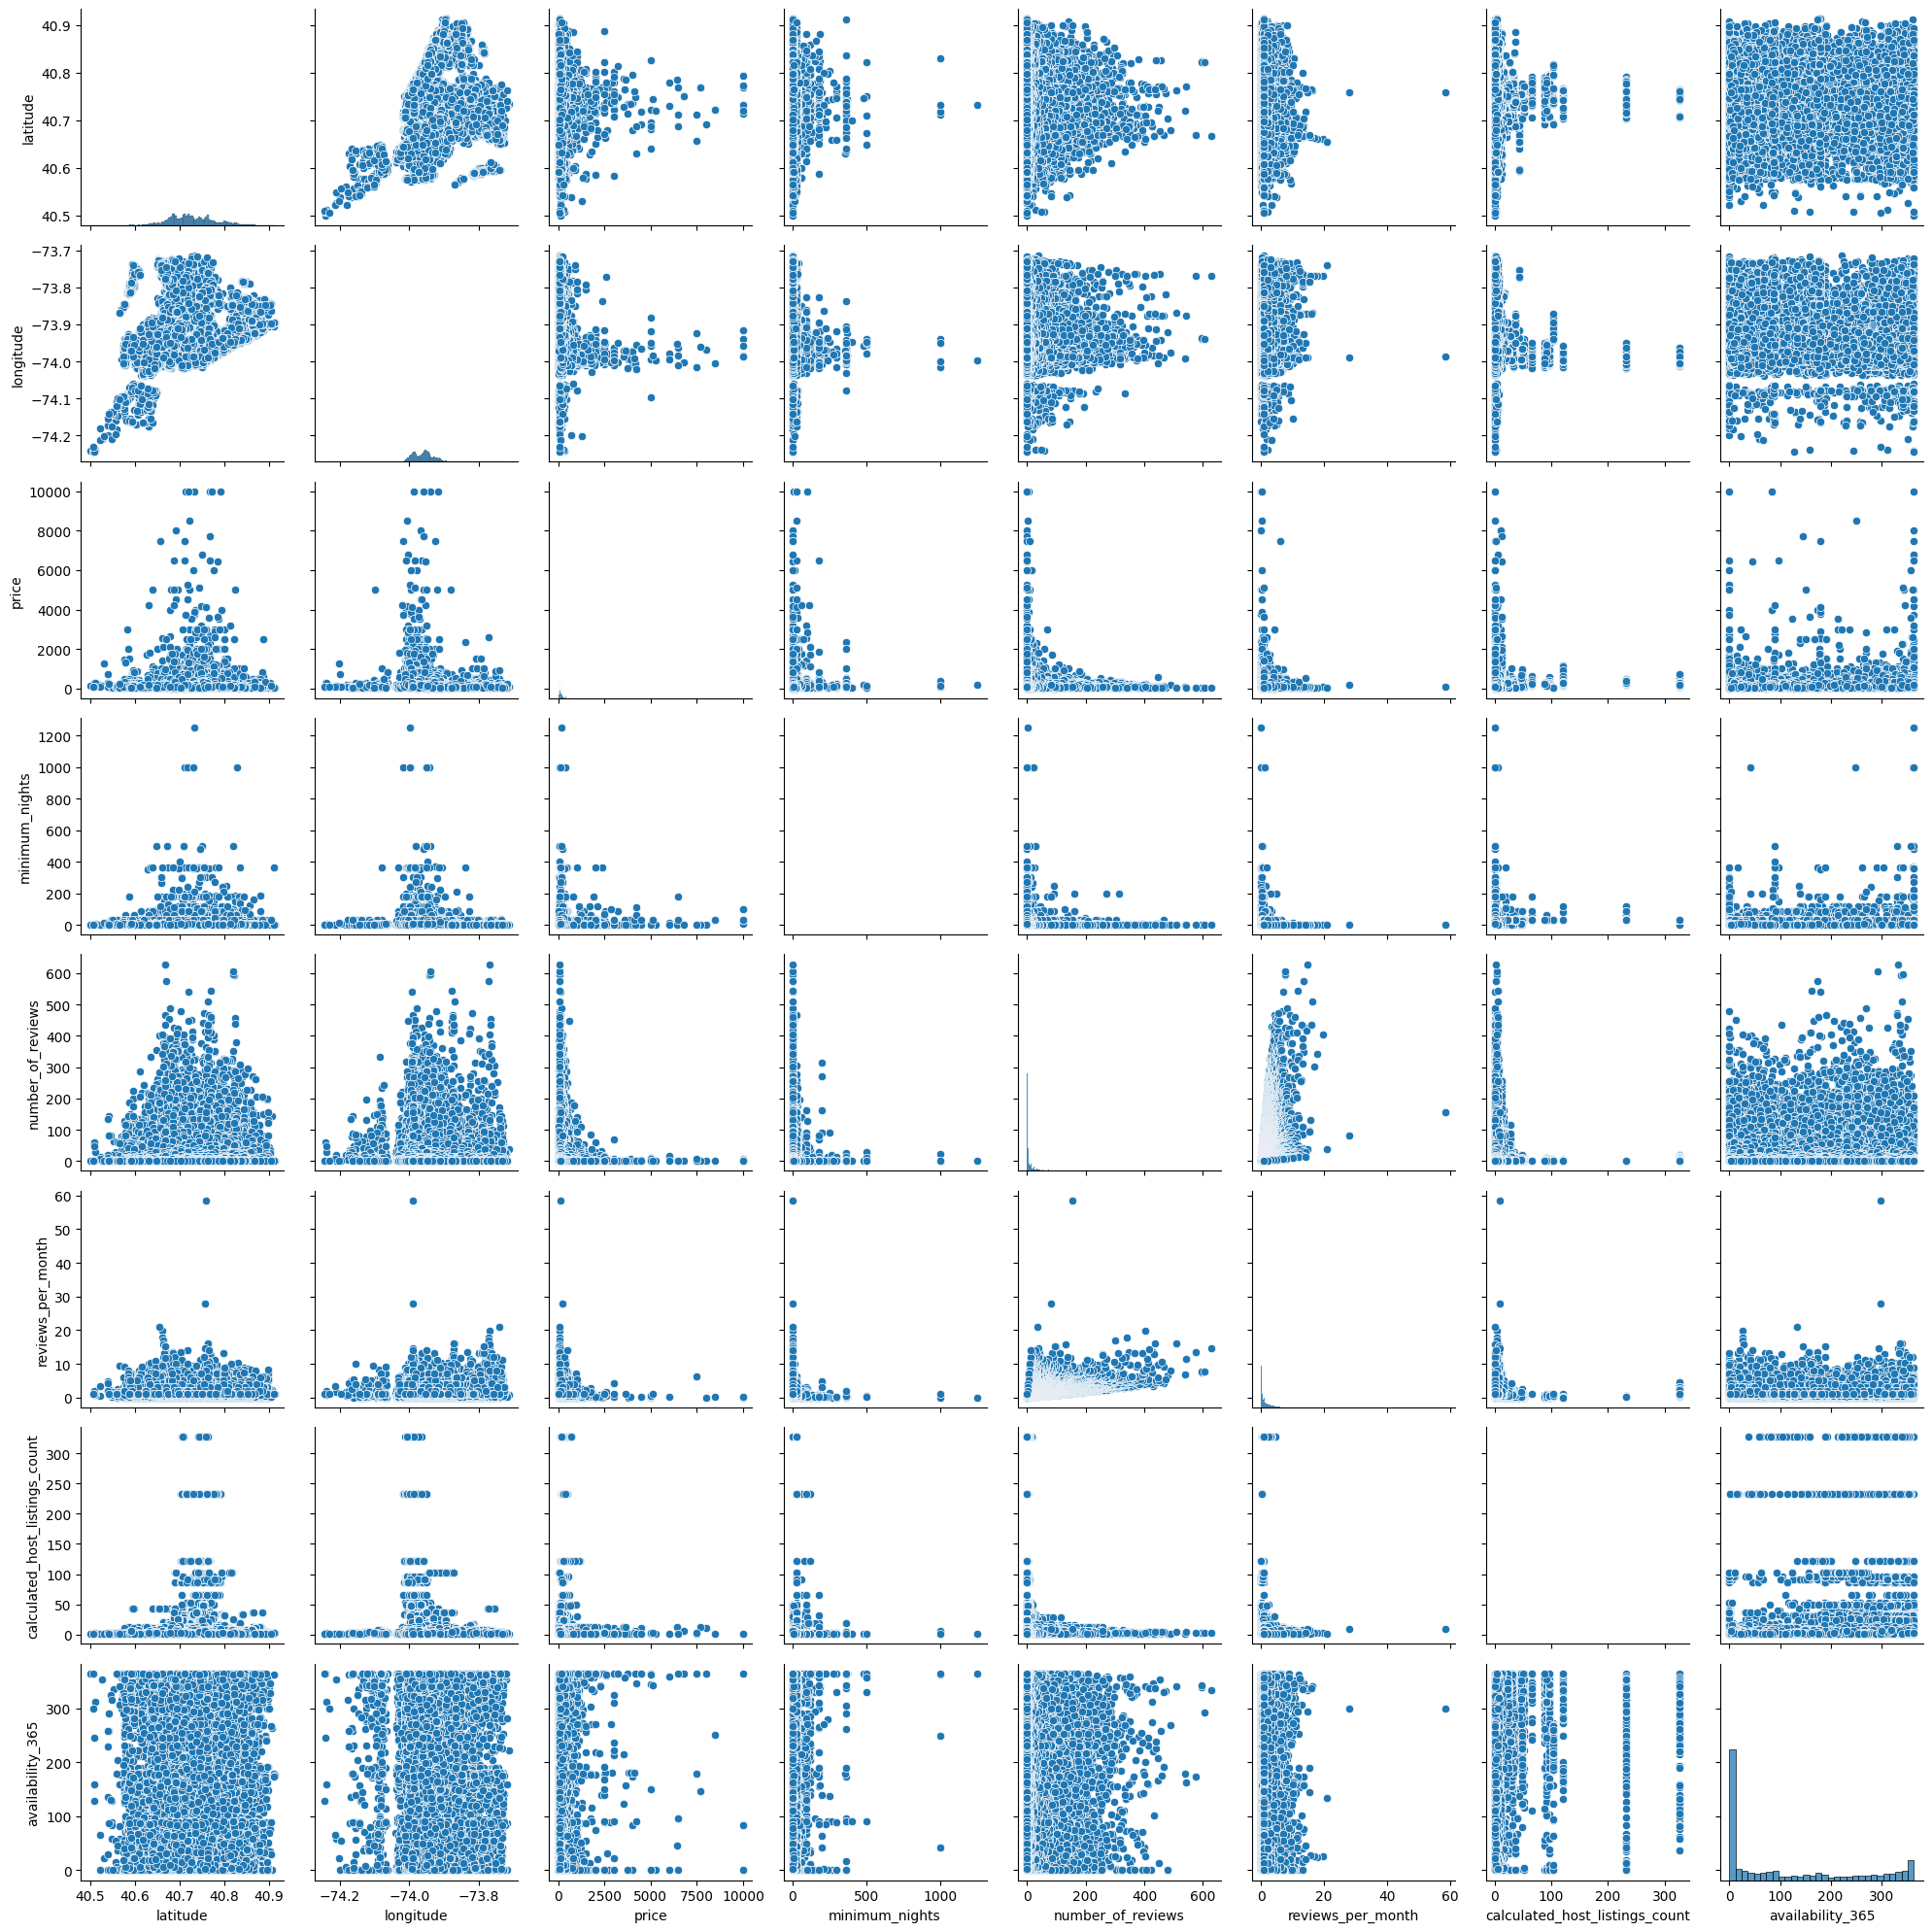

In [18]:
sns.pairplot(data = df)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

Day 2

In [19]:
df.describe().round(3)

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000,48895.000,48895.000,48895.000,48895.000,38843.000,48895.000,48895.000
mean,40.729,-73.952,152.721,7.030,23.274,1.373,7.144,112.781
std,0.055,0.046,240.154,20.511,44.551,1.680,32.953,131.622
min,40.500,-74.244,0.000,1.000,0.000,0.010,1.000,0.000
25%,40.690,-73.983,69.000,1.000,1.000,0.190,1.000,0.000
50%,40.723,-73.956,106.000,3.000,5.000,0.720,1.000,45.000
75%,40.763,-73.936,175.000,5.000,24.000,2.020,2.000,227.000
max,40.913,-73.713,10000.000,1250.000,629.000,58.500,327.000,365.000


In [20]:
price_stats = df["price"].describe()
price_stats

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

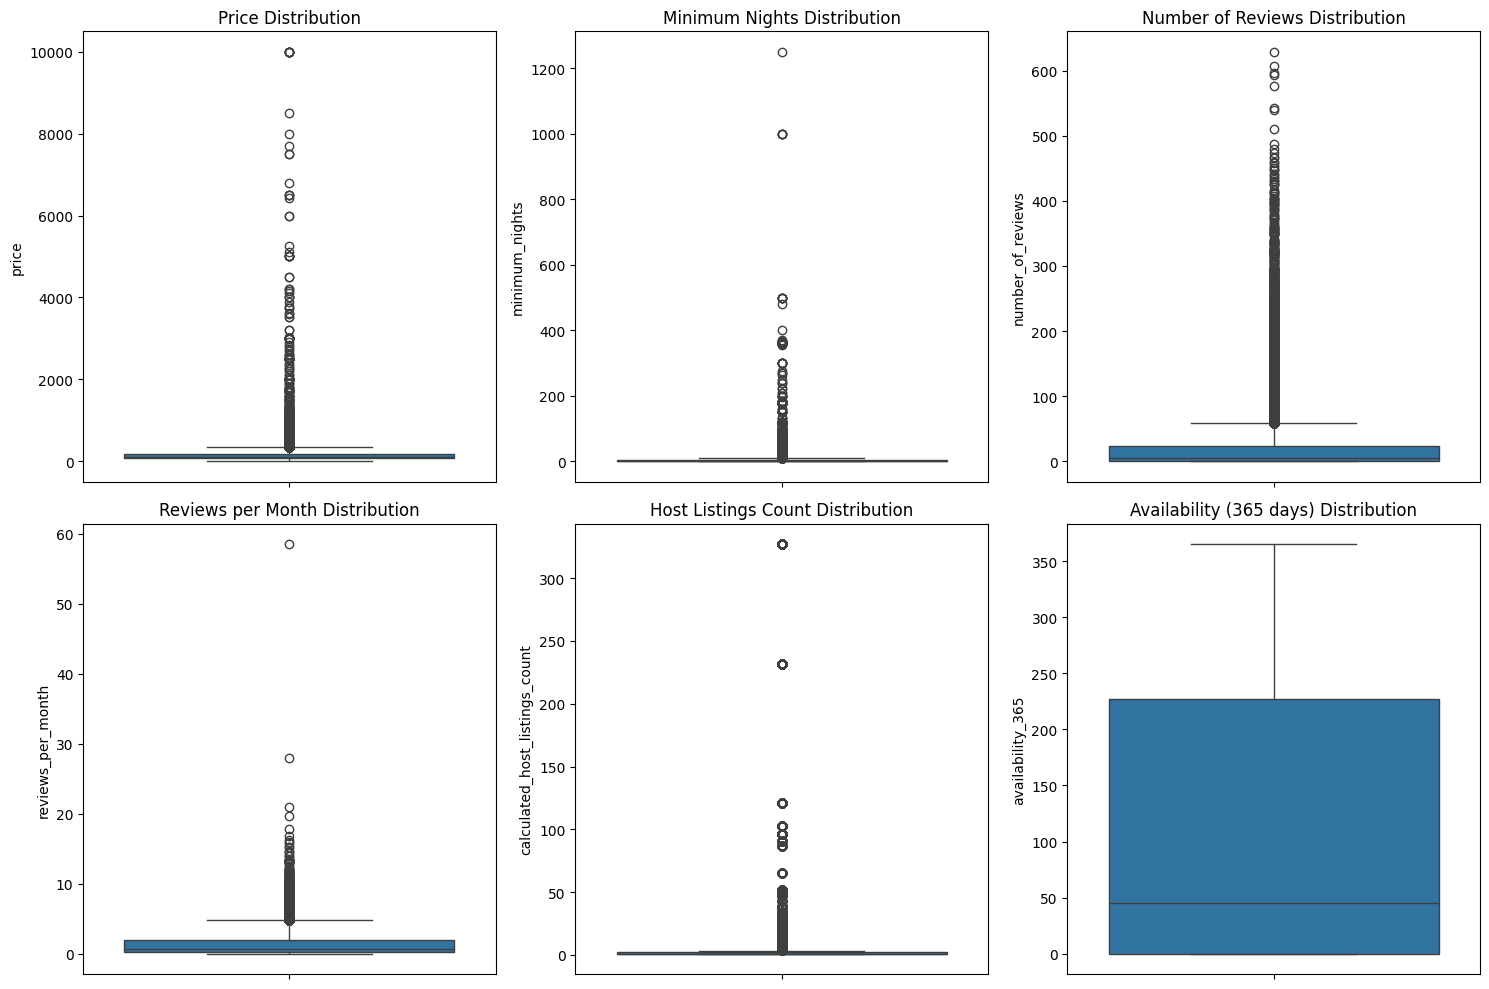

In [21]:
fig, axis = plt.subplots(2, 3, figsize=(15, 10))  # 2 rows, 3 columns for better layout

# Plot boxplots for various columns in the DataFrame
sns.boxplot(ax=axis[0, 0], data=df, y="price")
axis[0, 0].set_title("Price Distribution")

sns.boxplot(ax=axis[0, 1], data=df, y="minimum_nights")
axis[0, 1].set_title("Minimum Nights Distribution")

sns.boxplot(ax=axis[0, 2], data=df, y="number_of_reviews")
axis[0, 2].set_title("Number of Reviews Distribution")

sns.boxplot(ax=axis[1, 0], data=df, y="reviews_per_month")
axis[1, 0].set_title("Reviews per Month Distribution")

sns.boxplot(ax=axis[1, 1], data=df, y="calculated_host_listings_count")
axis[1, 1].set_title("Host Listings Count Distribution")

sns.boxplot(ax=axis[1, 2], data=df, y="availability_365")
axis[1, 2].set_title("Availability (365 days) Distribution")

# Adjust layout to prevent overlap and improve spacing
plt.tight_layout()

# Display the plot
plt.show()

In [22]:
# Calculate the 25th and 75th percentiles for the 'price' column
price_stats = df['price'].describe(percentiles=[0.25, 0.75])

# Calculate the interquartile range (IQR)
price_iqr = price_stats["75%"] - price_stats["25%"]

# Calculate the upper and lower limits for outliers
upper_limit = price_stats["75%"] + 1.5 * price_iqr
lower_limit = price_stats["25%"] - 1.5 * price_iqr

# Print the results
print(f"The upper and lower limits for finding outliers in the 'price' column are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(price_iqr, 2)}")

The upper and lower limits for finding outliers in the 'price' column are 334.0 and -90.0, with an interquartile range of 106.0


In [23]:
df[df["price"] > 8000]

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
6530,Manhattan,East Harlem,40.79264,-73.93898,Entire home/apt,9999,5,1,0.02,1,0
9151,Queens,Astoria,40.76810,-73.91651,Private room,10000,100,2,0.04,1,0
12342,Manhattan,Lower East Side,40.71355,-73.98507,Private room,9999,99,6,0.14,1,83
17692,Brooklyn,Greenpoint,40.73260,-73.95739,Entire home/apt,10000,5,5,0.16,1,0
29238,Manhattan,Upper West Side,40.77213,-73.98665,Entire home/apt,10000,30,0,NaN,1,83
30268,Manhattan,Tribeca,40.72197,-74.00633,Entire home/apt,8500,30,2,0.18,1,251
40433,Manhattan,Lower East Side,40.71980,-73.98566,Entire home/apt,9999,30,0,NaN,1,365


In [24]:
df[df["minimum_nights"] > 365]

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
1305,Brooklyn,Bushwick,40.70202,-73.92402,Entire home/apt,115,370,6,0.09,1,365
2854,Manhattan,Battery Park City,40.71239,-74.01620,Entire home/apt,400,1000,0,NaN,1,362
5767,Manhattan,Greenwich Village,40.73293,-73.99782,Entire home/apt,180,1250,2,0.03,1,365
7355,Queens,Long Island City,40.75104,-73.93863,Entire home/apt,134,500,30,0.57,1,90
8014,Manhattan,Harlem,40.82135,-73.95521,Entire home/apt,75,500,0,NaN,1,362
10829,Queens,Long Island City,40.74654,-73.95778,Entire home/apt,199,480,0,NaN,1,365
11193,Brooklyn,Crown Heights,40.67255,-73.94914,Private room,50,500,10,0.22,1,365
13404,Manhattan,Harlem,40.82915,-73.94034,Entire home/apt,99,999,2,0.07,1,42
14285,Brooklyn,Kensington,40.64779,-73.97956,Private room,45,500,0,NaN,1,358
15946,Manhattan,Midtown,40.74513,-73.98475,Entire home/apt,250,366,0,NaN,1,365


In [25]:
df.isnull().sum().sort_values(ascending=False)

reviews_per_month                 10052
neighbourhood                         0
neighbourhood_group                   0
latitude                              0
longitude                             0
price                                 0
room_type                             0
minimum_nights                        0
number_of_reviews                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [26]:
df.isnull().sum().sort_values(ascending=False) / len(df)

reviews_per_month                 0.205583
neighbourhood                     0.000000
neighbourhood_group               0.000000
latitude                          0.000000
longitude                         0.000000
price                             0.000000
room_type                         0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
calculated_host_listings_count    0.000000
availability_365                  0.000000
dtype: float64

In [27]:
#df["price_per_night"] = df["price"] / df["minimum_nights"]

#df.head()

In [27]:
#df.describe().round(3)

In [28]:
# One-hot encode 'neighbourhood_group', 'neighbourhood', and 'room_type'
df_encoded = pd.get_dummies(df, columns=['neighbourhood_group', 'neighbourhood', 'room_type'], drop_first=True)

#df_encoded = df_encoded.drop(columns = ['neighbourhood_group', 'neighbourhood', 'room_type'], errors='igmore')

# Display the first few rows of the updated DataFrame
print(df_encoded.head())

   latitude  longitude  price  minimum_nights  number_of_reviews  \
0  40.64749  -73.97237    149               1                  9   
1  40.75362  -73.98377    225               1                 45   
2  40.80902  -73.94190    150               3                  0   
3  40.68514  -73.95976     89               1                270   
4  40.79851  -73.94399     80              10                  9   

   reviews_per_month  calculated_host_listings_count  availability_365  \
0               0.21                               6               365   
1               0.38                               2               355   
2                NaN                               1               365   
3               4.64                               1               194   
4               0.10                               1                 0   

   neighbourhood_group_Brooklyn  neighbourhood_group_Manhattan  ...  \
0                          True                          False  ...   
1   

In [29]:
# Convert all boolean columns (True/False) to 1/0
df_encoded = df_encoded.applymap(lambda x: int(x) if isinstance(x, bool) else x)

# Display the first few rows of the updated DataFrame
print(df_encoded.head())

/tmp/ipykernel_43126/736948326.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_encoded = df_encoded.applymap(lambda x: int(x) if isinstance(x, bool) else x)


   latitude  longitude  price  minimum_nights  number_of_reviews  \
0  40.64749  -73.97237    149               1                  9   
1  40.75362  -73.98377    225               1                 45   
2  40.80902  -73.94190    150               3                  0   
3  40.68514  -73.95976     89               1                270   
4  40.79851  -73.94399     80              10                  9   

   reviews_per_month  calculated_host_listings_count  availability_365  \
0               0.21                               6               365   
1               0.38                               2               355   
2                NaN                               1               365   
3               4.64                               1               194   
4               0.10                               1                 0   

   neighbourhood_group_Brooklyn  neighbourhood_group_Manhattan  ...  \
0                             1                              0  ...   
1   

In [32]:
# Define the columns to be scaled
columns_to_scale = ['latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 
                     'reviews_per_month', 'calculated_host_listings_count', 'availability_365']

# One-hot encode categorical variables and convert boolean to int
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded = df_encoded.applymap(lambda x: int(x) if isinstance(x, bool) else x)

# Define X (features) and y (target)
X = df_encoded.drop("price", axis=1)  # Drop the target variable
y = df_encoded["price"]  # Target variable

# Ensure the specified columns are in the DataFrame
columns_to_scale = [col for col in columns_to_scale if col in X.columns]

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling for specified columns only
scaler = StandardScaler()
X_train[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])
X_test[columns_to_scale] = scaler.transform(X_test[columns_to_scale])

# Display the first few rows of the training set
print(X_train.head())

/tmp/ipykernel_43126/1581267966.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_encoded = df_encoded.applymap(lambda x: int(x) if isinstance(x, bool) else x)


       latitude  longitude  minimum_nights  number_of_reviews  \
32645 -0.241172  -0.064946       -0.193025          -0.277198   
23615  2.204077   0.257030       -0.239596          -0.479451   
31183 -0.714824  -0.155542       -0.239596          -0.524396   
29260 -0.818573   0.459080       -0.193025           1.430714   
7275   0.332197   1.231213       -0.099884          -0.232253   

       reviews_per_month  calculated_host_listings_count  availability_365  \
32645          -0.302289                       -0.186570         -0.852862   
23615          -0.722756                       -0.186570         -0.860447   
31183                NaN                       -0.156424         -0.860447   
29260           2.090224                       -0.186570          1.164663   
7275           -0.669457                       -0.186570         -0.860447   

       neighbourhood_group_Brooklyn  neighbourhood_group_Manhattan  \
32645                             1                              0   


In [33]:
# Display the first few rows of the test set
print(X_test.head())

       latitude  longitude  minimum_nights  number_of_reviews  \
879   -1.565162  -0.553123       -0.193025           0.868901   
44383 -0.408160   0.967245        0.645248          -0.524396   
15394  0.590836  -0.822305       -0.239596          -0.142363   
43230 -0.390379  -1.264207       -0.239596          -0.412033   
16332  1.240092   0.422363       -0.239596           0.149780   

       reviews_per_month  calculated_host_listings_count  availability_365  \
879            -0.397042                       -0.186570          0.573058   
44383                NaN                       -0.186570         -0.306765   
15394          -0.562860                       -0.186570         -0.860447   
43230           0.295839                        9.640935          1.202586   
16332          -0.343744                       -0.186570         -0.632906   

       neighbourhood_group_Brooklyn  neighbourhood_group_Manhattan  \
879                               1                              0   


In [34]:
X_train["price"] = list(y_train)
X_test["price"] = list(y_test)